In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm,skew
from scipy import stats




In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#since sales prices is our target variable
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

preprocessing


<AxesSubplot:>

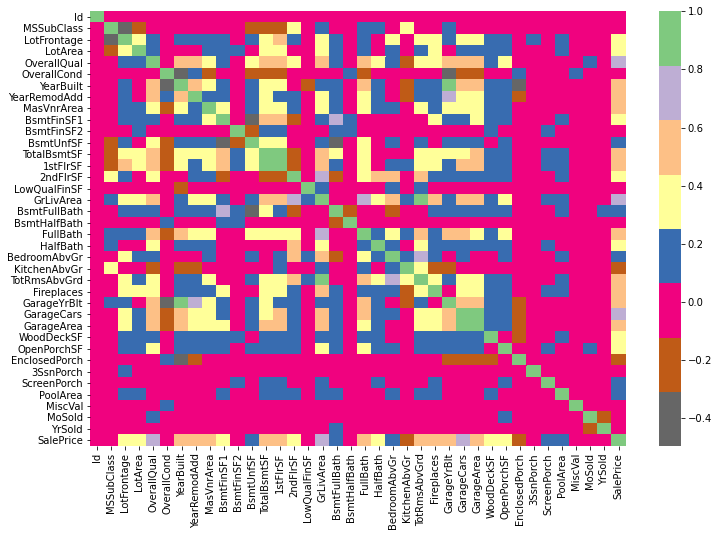

In [11]:
#pearson correlation
corr_matrix = train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap=plt.cm.Accent_r)

so seems like there are 2 green 

<AxesSubplot:>

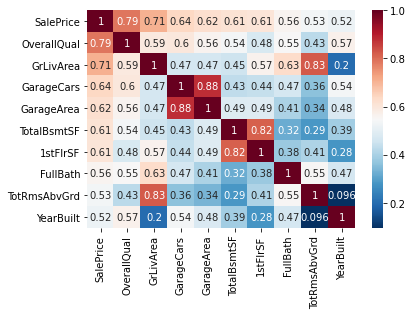

In [12]:
#now for sales price
k = 10
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
k_corr_matrix = train[cols].corr()
#plt.figure(figsize=(12, 8))
sns.heatmap(k_corr_matrix, annot=True, cmap=plt.cm.RdBu_r)

most correlated features
overallqual ,grilivatea, garage areas

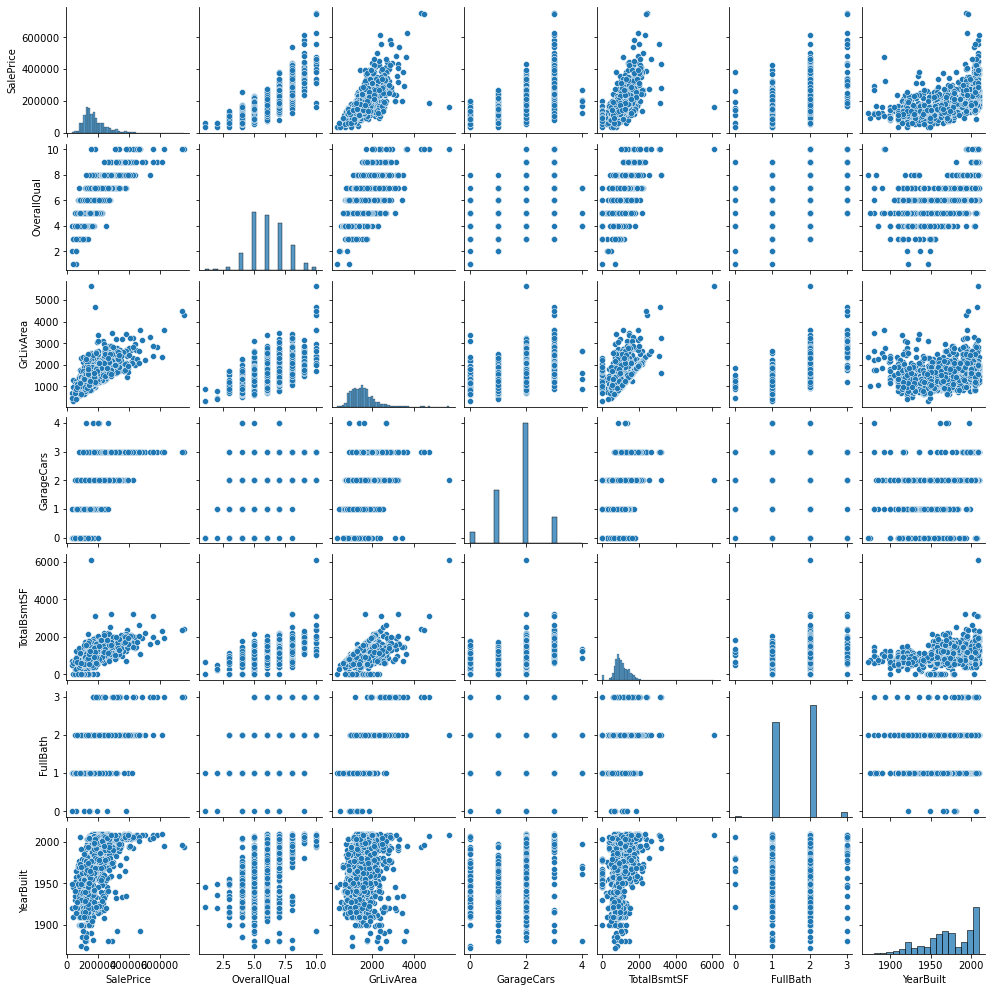

In [13]:
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(train[cols],height = 2)

few hof them have a linear relationship<br>
TotalBSmtsf and GrLIvArea<br>
GrlivAre ~ saleprice and totalbsmtsf ~ saleprice

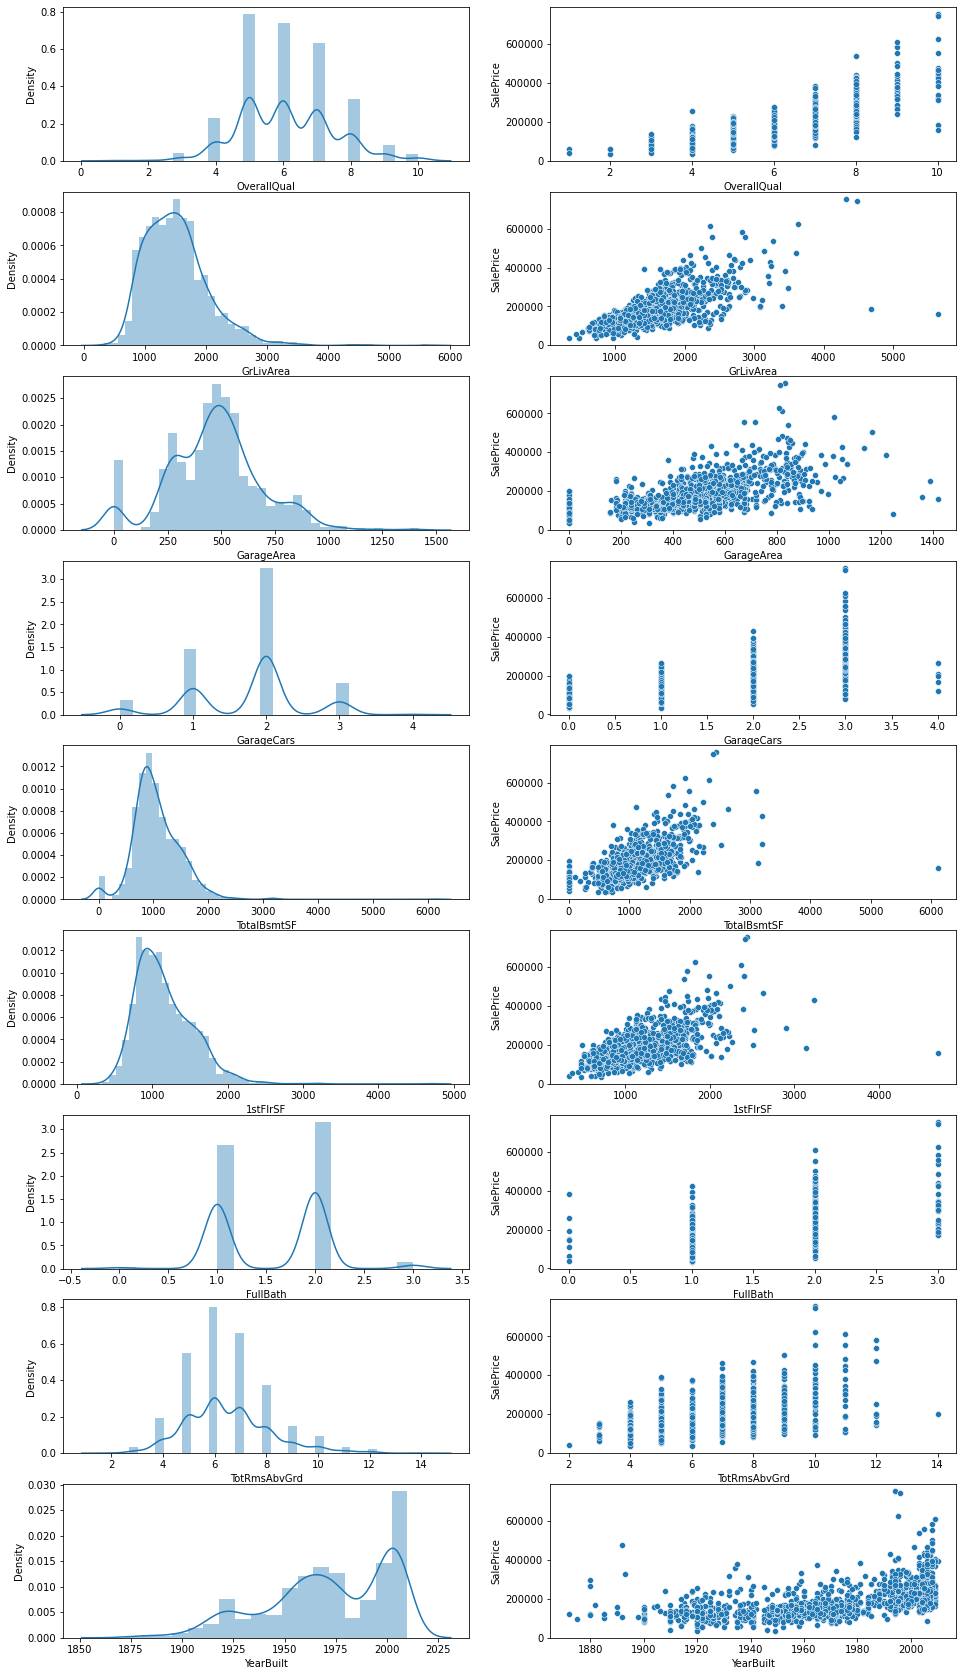

In [14]:
plt.figure(figsize=(16,30))
for idx, f in enumerate(['OverallQual','GrLivArea',
                        'GarageArea','GarageCars','TotalBsmtSF','1stFlrSF',
                        'FullBath','TotRmsAbvGrd','YearBuilt']):
    plt.subplot(9,2,2*idx+1)
    sns.distplot(train[f])
    plt.subplot(9,2,2*idx+2)
    sns.scatterplot(x=f,y='SalePrice',data =train)

<AxesSubplot:>

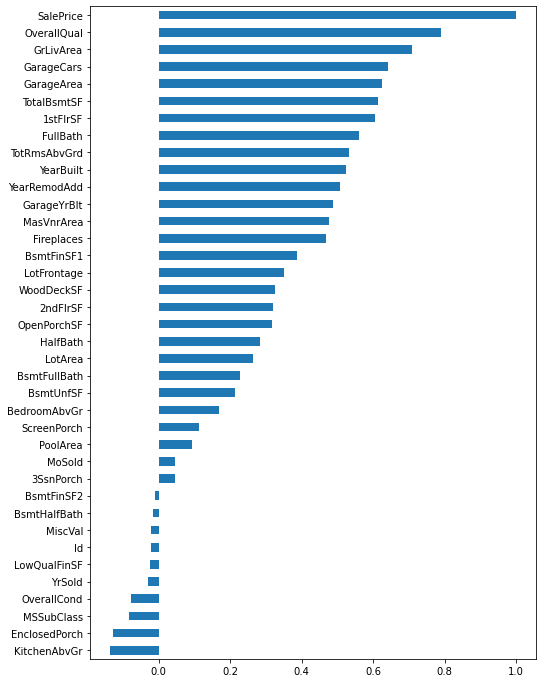

In [15]:
plt.figure(figsize=(8,12))
train.corr()['SalePrice'].sort_values().plot(kind='barh')


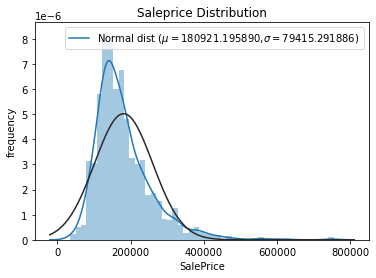

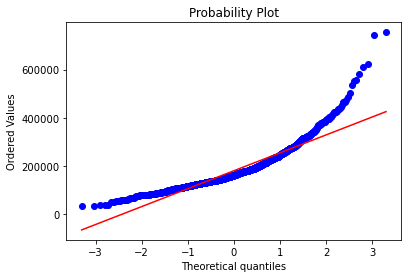

In [16]:
#analyzing the target variable first to see if it fits a normal distrubution
sns.distplot(train['SalePrice'],fit=norm)
(mu,sigma)=norm.fit(train['SalePrice'])
plt.legend(['Normal dist ($\mu=${:2f},$\sigma=${:2f}) '.format(mu,sigma)])
plt.ylabel("frequency")
plt.title('Saleprice Distribution')

#normal probability plot
fig = plt.figure()
res= stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [17]:
#skewnesss and kurtosis
print("skewness ",train['SalePrice'].skew())
print("kurtosis ",train['SalePrice'].kurt())

skewness  1.8828757597682129
kurtosis  6.536281860064529


In [18]:
#applying log transformation on saleprice
train['SalePriceLog'] = np.log1p(train['SalePrice'])

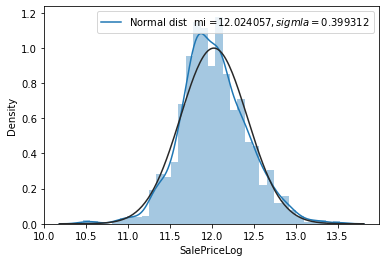

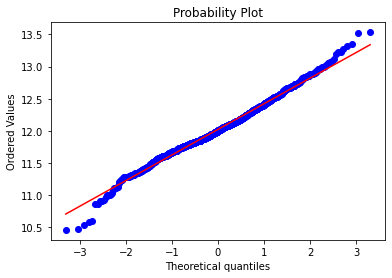

In [19]:
#distribution histogram and normal probability plot
(mu,sigma)=norm.fit(train['SalePriceLog'])


sns.distplot(train['SalePriceLog'], fit = norm)
plt.legend(['Normal dist  mi =${:2f},  sigmla =${:2f}'.format(mu,sigma)])
fig = plt.figure()
stats.probplot(train['SalePriceLog'], plot = plt)
plt.show()

outliers


#Saleprice distribution<br>
standardize the data and see if any outlier points
x = (x-mu)/sigma

outer range (low) of the distribution: 
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]
outer range (high) of the distribution: 
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


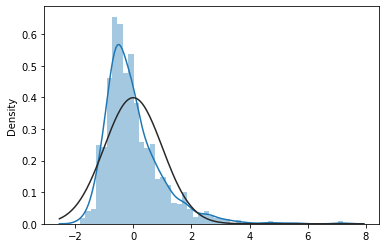

In [20]:
from sklearn.preprocessing import StandardScaler
sale_price_scaled= StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis])

sns.distplot(sale_price_scaled, fit =norm)

low_range= sale_price_scaled[sale_price_scaled[:,0].argsort()[:10]]

high_range=sale_price_scaled[sale_price_scaled[:,0].argsort()[-10:]]
print(f'outer range (low) of the distribution: \n{low_range}')
print(f'outer range (high) of the distribution: \n{high_range}')

low is within2 sd(sigma)
high like 7.x are out of range
at least the 2 points with value greater than 7 should be considered as outlier


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

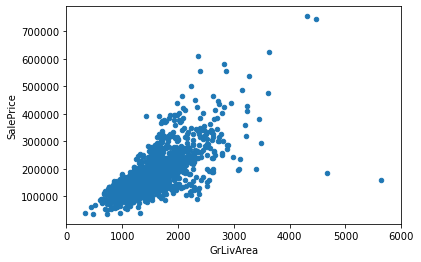

In [21]:
#scatter plot
train.plot.scatter(x='GrLivArea', y= 'SalePrice', ylim=(0.800000), xlim=(0,6000))

points geater than 6000 in case of saelprice and 00 in case of GrLIveArea are definitely outliers

In [22]:
train = train[train['GrLivArea']<4000]

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

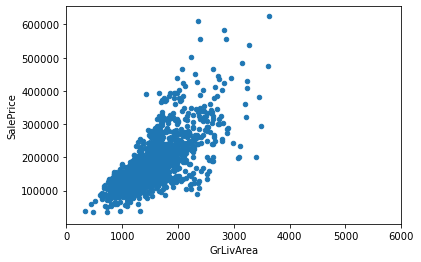

In [23]:
#scatter plot
train.plot.scatter(x='GrLivArea', y= 'SalePrice', ylim=(0.800000), xlim=(0,6000))

In [24]:
#feature engineering
#quantitative and qualitative
quantitative = [ f for f in train.columns if train.dtypes[f]!='object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
quantitative.sort()
qualitative= [f for f in train.columns if train.dtypes[f]=='object']
qualitative.sort()

In [25]:
#continuous
quantitative

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePriceLog',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold']

In [26]:
#categorical
qualitative

['Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [27]:
#concatenating test and train
train.reset_index(drop =True,inplace = True)
y_train = train['SalePriceLog']
X_train = train.drop(['SalePrice','SalePriceLog'], axis = 1)
X_test= test

In [28]:
all_data = pd.concat([X_train,test], axis = 0 ,sort=False)
all_data.drop(['Id'], axis = 1, inplace=True)
all_data.shape

(2915, 79)

In [29]:
#missing data
na_tot= all_data.isnull().sum().sort_values(ascending=False)
na_ratio= (all_data.isnull().sum()/all_data.shape[0]).sort_values(ascending=False)
missing_data= pd.concat([na_tot,na_ratio], axis = 1, keys  =['Total','Ratio'])
missing_data.head(50)

,Total,Ratio
PoolQC,2907,0.997256
MiscFeature,2810,0.963979
Alley,2717,0.932075
Fence,2345,0.804460
FireplaceQu,1420,0.487136
LotFrontage,486,0.166724
GarageYrBlt,159,0.054545
GarageFinish,159,0.054545
GarageQual,159,0.054545
GarageCond,159,0.054545


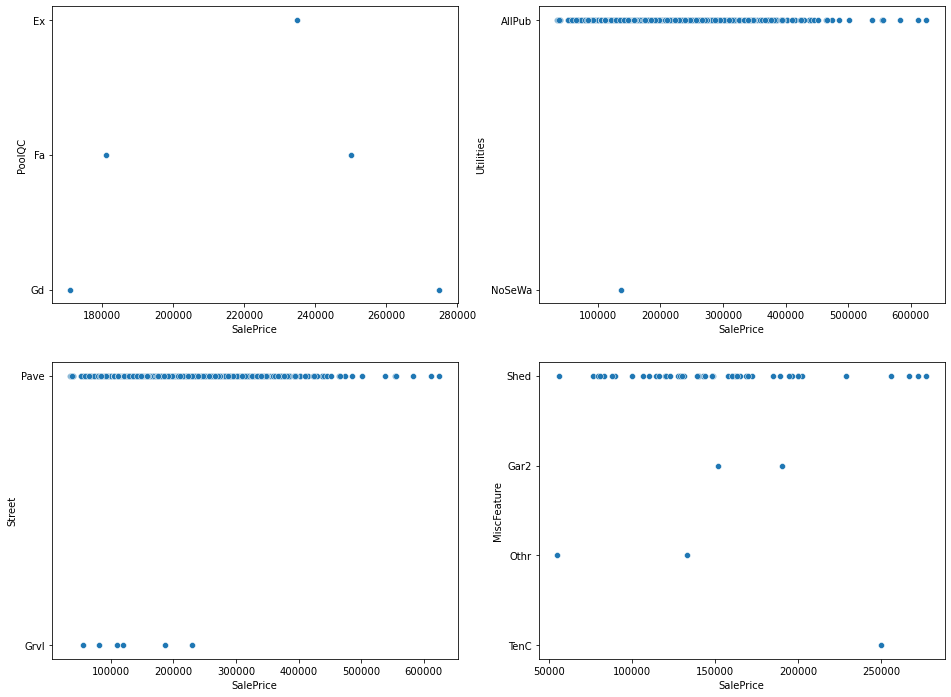

In [30]:
#most of the top values are missing. since they haveno pattern delete them
plt.figure(figsize=(16,12))
for idx,f in enumerate(['PoolQC','Utilities','Street','MiscFeature']):
    plt.subplot(2,2,idx+1)
    sns.scatterplot(x='SalePrice', y= f, data= train)
all_data.drop(['PoolQC','Utilities','Street','MiscFeature'], axis = 1, inplace=True)

according to the data  NA means None for categorical features so replaceing

In [31]:
all_data['Alley'].fillna('None', inplace=True)
all_data['Fence'].fillna('None', inplace=True)
all_data['FireplaceQu'].fillna('None', inplace=True)

all_data['GarageQual'].fillna('None', inplace=True)
all_data['GarageFinish'].fillna('None',inplace=True)
all_data['GarageCond'].fillna('None', inplace=True)
all_data['GarageType'].fillna('None', inplace=True)

all_data['BsmtExposure'].fillna('None', inplace=True)
all_data['BsmtCond'].fillna('None', inplace=True)
all_data['BsmtQual'].fillna('None', inplace=True)
all_data['BsmtFinType1'].fillna('None', inplace=True)


In [32]:
#for categorical features  without NA , fill it with NA'
all_data['MasVnrType'].fillna('None',inplace =True)
all_data['HasMasVnr'] = all_data['MasVnrType'].apply(lambda x:0 if x=='None' else 1)

all_data['MSZoning']=all_data.groupby(['MSSubClass'])['MSZoning'].transform(lambda x:x.fillna(x.mode()[0]))
all_data['Functional'].fillna('Type', inplace=True)
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual']=all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['SaleType']= all_data['SaleType'].fillna(all_data['SaleType'].fillna(all_data['SaleType'].mode()[0]))
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])


In [33]:
all_data['LotFrontage']=all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))


In [34]:
all_data['GarageYrBlt']=(all_data['YearBuilt']+all_data['YearRemodAdd'])/2

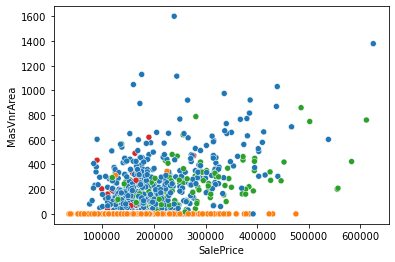

In [35]:
sns.scatterplot(x='SalePrice',y='MasVnrArea', hue ='MasVnrType',data=train,legend=None)
all_data['MasVnrArea']=all_data.groupby(['MasVnrType'])['MasVnrArea'].transform(lambda x:x.fillna(x.median()))

In [36]:
print(all_data[all_data['GarageCars'].isnull()][['GarageArea','GarageCars','GarageType',
                                                'GarageYrBlt','GarageQual']])
all_data['GarageArea'].fillna(0,inplace=True)
all_data['GarageArea'].fillna(0,inplace=True)

      GarageArea  GarageCars GarageType  GarageYrBlt GarageQual
1116         NaN         NaN     Detchd       1961.0       None


In [37]:
print(all_data[all_data['TotalBsmtSF'].isnull()][
    ['TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFullBath','BsmtHalfBath']])
all_data['TotalBsmtSF'].fillna(0, inplace=True)
all_data['BsmtUnfSF'].fillna(0, inplace=True)
all_data['BsmtFinSF1'].fillna(0, inplace=True)
all_data['BsmtFinSF2'].fillna(0, inplace=True)
all_data['BsmtFullBath'].fillna(0, inplace=True)
all_data['BsmtHalfBath'].fillna(0, inplace=True)

     TotalBsmtSF BsmtQual BsmtCond  BsmtFinSF2  BsmtUnfSF  BsmtFinSF1  \
660          NaN     None     None         NaN        NaN         NaN   

     BsmtFullBath  BsmtHalfBath  
660           NaN           NaN  


In [38]:
all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']
all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

all_data['TotalSqrFootage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])

all_data['TotalBathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

all_data['TotalPorchSF'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

In [39]:
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [40]:
# Some of the non-numeric predictors are stored as numbers; we convert them into strings 
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [41]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)

In [42]:
# creating model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression,ElasticNet, Lasso, Ridge,ElasticNetCV, LassoCV,RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR





model 1

In [43]:
linreg= LinearRegression()
linreg.fit(X_train, y_train)
lin_pred = linreg.best_estimator




ValueError: could not convert string to float: 'RL'

In [49]:
#defining cross validation strategy
def rmse_cv(model):
    mse =cross_val_score(model,X_train.values,y_train, scoring='neg_mean_squared_error', cv= 5)
    rmse=np.sqrt(-mse)
    print("mse is", rmse.mean())

In [44]:
lasso =Lasso()
lasso_search =GridSearchCV(lasso, {'alpha':np.logspace(-4,-3,5)}, cv=5, scoring ='neg_mean_squared_error')
lasso_search.fit(X_train,y_train)
lasso_search.best_estimator_

ValueError: could not convert string to float: 'RL'

In [51]:
lasso_model = make_pipeline(RobustScaler(),Lasso(alpha = 0.0005, random_state=1))
rmse_cv(lasso_model)

mse is 0.11142702881165718


Ridge

In [52]:
ridge =Ridge()
ridge_Search = GridSearchCV(ridge, {'alpha':np.linspace(10,30,10)}, cv =5, scoring='neg_mean_squared_error')
ridge_Search.fit(X_train,y_train)
ridge_Search.best_estimator_

Ridge(alpha=18.88888888888889)

In [53]:
ridge_model =make_pipeline(RobustScaler(),Ridge(alpha=18.889))
rmse_cv(ridge_model)

mse is 0.1147947054051905


In [61]:
enet=  ElasticNet()
enet_search = GridSearchCV(enet,{'alpha':np.linspace(0.0001,0.001,1),"l1_ratio":np.linspace(0.5,1.5,10)}, cv=5,scoring='neg_mean_squared_error')
enet_search.fit(X_train,y_train)
enet_search.best_estimator_

ElasticNet(alpha=0.0001, l1_ratio=0.9444444444444444)

In [62]:
enet_model =make_pipeline(RobustScaler(),ElasticNet(alpha=0.004, l1_ratio=0.9, random_state=3 ))
rmse_cv(enet_model)

mse is 0.12306983151744677


In [63]:
gbr = GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=5,min_samples_split=10,
                               max_depth=4,n_estimators=3000)
rmse_cv(gbr)

mse is 0.12010003998857899


In [64]:
rf=RandomForestRegressor(min_samples_leaf=4,min_samples_split=8)
rmse_cv(rf)

mse is 0.1369635781130874


In [65]:
svr=make_pipeline(RobustScaler(),SVR(C=20, epsilon= 0.005, gamma =0.0003))
rmse_cv(svr)

mse is 0.1746427265652861


In [66]:
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

In [60]:
lasso_model = lasso_model.fit(X_train,y_train)
ridge_model=ridge_model.fit(X_train,y_train)
enet_model=enet_model.fit(X_train,y_train)
gbr_model = gbr.fit(X_train,y_train)
rf_model = rf.fit(X_train,y_train)
svr_model = svr.fit(X_train,y_train)


ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.4

In [ ]:
log_result= combine_models_predict(X_test)
result= np.expm1(log_result)